# パーセプトロン
根幹的な概念としては、複数の入力を得て、それに特定の処理を行い、1つの出力を確定するような仕組みの事
<br>
<p>パーセプトロンの出力信号は０と１の2値の値</p>
<p>今回は０を信号を流す、１を信号を流さないに対応させて話すことにします</p>
<div style='display: flex;'>
    <div  style='width: 400px;'>
        <div>
            ↓神経細胞の図
        </div>
        <div>
            <img src='https://stonewashersjournal.com/wp-content/uploads/2015/03/15028-4-1024x551.png' />
        </div>
    </div>
    <div style='width: 500px;'>
        <div>
            ↓パーセプトロンの図
        </div>
        <div>
            <img src='https://city3939.com/wp-content/uploads/2018/10/%e3%83%91%e3%83%bc%e3%82%bb%e3%83%97%e3%83%88%e3%83%ad%e3%83%b30.png' />
        </div>
    </div>
</div>
    <font size=2>神経細胞の図：https://stonewashersjournal.com/wp-content/uploads/2015/03/15028-4-1024x551.png</font><br>
    <font size=2>パーセプトロンの図：https://city3939.com/wp-content/uploads/2018/10/%e3%83%91%e3%83%bc%e3%82%bb%e3%83%97%e3%83%88%e3%83%ad%e3%83%b30.png</font>

パーセプトロンの図では、$x_1, x_2$が入力信号、yが出力信号、$w_1, w_2$が重みを表します<br>
このとき、$w_1, w_2$によって重み付けされた値がyに入力されます$(w_1x_1, w_2x_2)$<br>
パーセプトロンでは、この入力がある値を超えた際に、出力信号として１を超えなければ0を出力する<br>
この時の、0と1の出力を制御する値を`閾値`という
$$ y = 
    \begin{cases}
        {0 ~ (w_1x_1 + w_2x_2 \le \theta)}\\
        {1 ~ (w_1x_1 + w_2x_2 > \theta)}
    \end{cases}
$$

## 論理ゲート
### ANDゲート
|$x_1$|$x_2$|$y$|
|-|-|-|
|0|0|0|
|1|0|0|
|0|1|0|
|1|1|1|

**テーブルの見方：$x_1$列, $x_2$列がそれぞれの入力に対応し、$y$列がはその出力に対応する**<br>
上の条件を満たすように、パーセプトロンを組もうと思うと$(w_1, w_2, \theta)$をどのように設定すればよいだろうか<br>
<!-- 一番簡単な例：$(w_1, w_2, \theta) = (1, 1, 1)$ -->

In [1]:
def AND(x1, x2):
    # 個々の値を調整しよう
    w1, w2, theta = 1, 1, 1
    tmp = x1*w1 + x2*w2
    if tmp > theta:
        return 1
    else:
        return 0

In [2]:
# 実際に試してみよう
AND(0, 0)

0

**以下の二つのゲートについても考えてみよう**
### NANDゲート
|$x_1$|$x_2$|$y$|
|-|-|-|
|0|0|1|
|1|0|1|
|0|1|1|
|1|1|0|

<!-- 一番簡単な例：$(w_1, w_2, \theta) = (-1, -1, -2)$ -->

### ORゲート
|$x_1$|$x_2$|$y$|
|-|-|-|
|0|0|0|
|1|0|1|
|0|1|1|
|1|1|1|

<!-- 一番簡単な例：$(w_1, w_2, \theta) = (1, 1, 0)$ -->

In [3]:
def NAND(x1, x2):
    # 個々の値を調整しよう
    w1, w2, theta = -1, -1, -2
    tmp = x1*w1 + x2*w2
    if tmp > theta:
        return 1
    else:
        return 0

def OR(x1, x2):
    # 個々の値を調整しよう
    w1, w2, theta = 1, 1, 0
    tmp = x1*w1 + x2*w2
    if tmp > theta:
        return 1
    else:
        return 0

In [4]:
NAND(0, 1)

1

In [5]:
OR(0, 1)

1

## パーセプトロンの限界
このパーセプトロンによって、AND,NAND,ORの3つのゲートが実装できたが、このパーセプトロンの限界について考えてみる   
先ほどのパーセプトロンにおける出力が0となるのか、1となるのかの境界（決定境界）は以下のようになる
$$x_1w_1 + x_2w_2 = \theta$$
これを式変形すると
$$ x_2 = \frac{-x_1w_1 + \theta}{w_2}$$
慣れ親しんだ形式でみるのであれば
$$ y = \frac{-xw_1 + \theta}{w_2}; w1, w2は定数$$

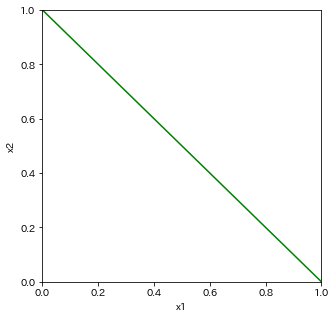

In [6]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

# 関数の用意
f = lambda x: ((-x)*1 + 1) / 1

x1 = np.linspace(0.0, 1, 10)
x2 = f(x1)

plt.figure(figsize=(5, 5))
plt.plot(x1, x2, color='g')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

### XORゲート
|$x_1$|$x_2$|$y$|
|-|-|-|
|0|0|0|
|1|0|1|
|0|1|1|
|1|1|0|

このゲートは単体のパーセプトロンで表せるだろうか


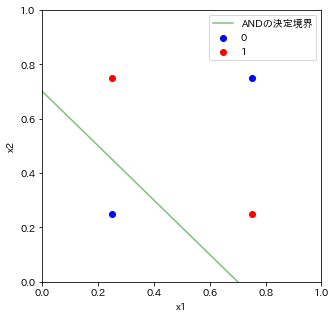

In [7]:
elemtnts_0 = [
    [0.75, 0.75],
    [0.25, 0.25],
]
elemtnts_1 = [
    [0.75, 0.25],
    [0.25, 0.75],
]

plt.figure(figsize=(5, 5))
g = lambda x: ((-x)*1 + 0.7) / 1
plt.plot(x1, g(x1), color='g', alpha=0.5, label='ANDの決定境界')
plt.scatter(list(zip(*elemtnts_0))[0], list(zip(*elemtnts_0))[1], color='b', label='0')
plt.scatter(list(zip(*elemtnts_1))[0], list(zip(*elemtnts_1))[1], color='r', label='1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.show()

見て貰えば分かるように、これは単体のパーセプトロンで解決できないタスクになってくる   

# 多層パーセプトロン
<p>
単体のパーセプトロンでは作成できないことが分かったが、実はこれは、複数のパーセプトロンを組み合わせることで、解決できることが分かっている
</p>
<img src="https://cdn1.byjus.com/wp-content/uploads/2020/06/xor-equivalent-circuit.png" />
<p>
上の画像は,これまで構築したゲートを利用して、XORゲートの出力を再現している。ここでも分かるように、パーセプトロンを複数組み合わせることで非線形の分離問題を解くことが可能になるのである。
</p>

|$x_1$|$x_2$|$s_1$：OR|$s_2$：NAND|$y$：AND(OR, NAND)|
|-|-|-|-|-|
|0|0|0|1|0|
|1|0|1|1|1|
|0|1|1|1|1|
|1|1|1|0|0|

In [8]:
def XOR(x1, x2):
    s1 = OR(x1, x2)
    s2 = NAND(x1, x2)
    y = AND(s1, s2)
    return y

In [9]:
XOR(1, 0)

1

<p>上記の構造をパーセプトロンの形式で見てみる</p>
<img src="https://unisia-se.com/static/macuos/img/b_id39_3.png" style="width: 350px;" />
<p>とまあ、このように、パーセプトロン（今回だと論理ゲート）を複数重ねることによってより複雑なものが表現出来ました。実際、NANDゲートの組み合わせだけで、コンピュータも作れちゃうくらいらしいです</p>